In [365]:
import pandas as pd 
import glob 
import matplotlib.pyplot as plt

In [366]:
#In order to list multiple csv files 

file_list=glob.glob("./directory/*.csv")

In [367]:
final_df = pd.DataFrame()
for filename in file_list:
    df = pd.read_csv(filename)
    final_df = pd.concat([final_df, df], ignore_index=True)
final_df
final_df.head(10)

,sale_time,purchaser_gender
0,2012-10-01 01:42:22,female
1,2012-10-01 02:24:53,female
2,2012-10-01 02:25:40,female
3,2012-10-01 02:30:42,female
4,2012-10-01 02:51:32,male
5,2012-10-01 03:03:00,female
6,2012-10-01 03:09:10,female
7,2012-10-01 03:09:40,male
8,2012-10-01 03:16:08,female
9,2012-10-01 03:43:50,female


In [369]:
final_df['sale_time'] = pd.to_datetime(final_df['sale_time'])

In [370]:
daily_sales_df = sale_day.groupby(sale_day.dt.floor('d')).size().reset_index(name='sales_amount')
daily_sales_df.rename(columns={'sale_time':'sale_day'},inplace=True)
daily_sales_df

,sale_day,sales_amount
0,2012-10-01,514
1,2012-10-02,482
2,2012-10-03,499
3,2012-10-04,546
4,2012-10-05,476
...,...,...
345,2013-09-11,719
346,2013-09-12,735
347,2013-09-13,743
348,2013-09-14,655


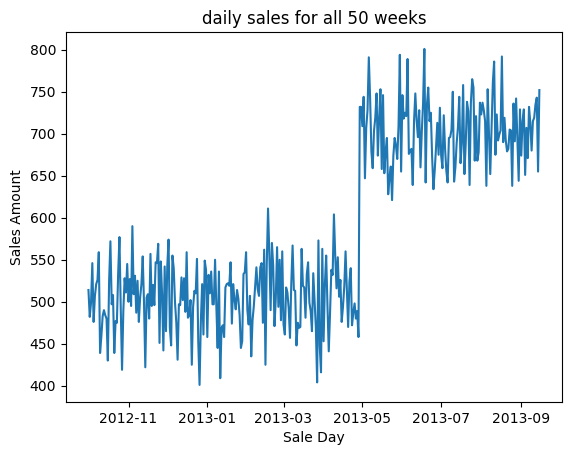

In [371]:
plt.plot(daily_sales_df['sale_day'], daily_sales_df['sales_amount'])
# Add labels and title
plt.xlabel('Sale Day')
plt.ylabel('Sales Amount')
plt.title('daily sales for all 50 weeks')
plt.show()

In [358]:
#to sort the vehicle
#It looks like there has been a sudden change in daily sales. What date did it occur?
daily_sales_df = daily_sales_df.sort_values('sale_day')
daily_sales_df['previous_day_sales_amount'] = daily_sales_df['sales_amount'].shift(1)
daily_sales_df['difference']=daily_sales_df['sales_amount']-daily_sales_df['previous_day_sales_amount']
max_difference_row = daily_sales_df.loc[daily_sales_df['difference'].idxmax()]
max_difference_row

sale_day                     2013-04-29 00:00:00
sales_amount                                 732
previous_day_sales_amount                  458.0
difference                                 274.0
Name: 210, dtype: object

In [372]:
final_df['sale_time'] = pd.to_datetime(final_df['sale_time'])
sales_amount_by_day_gender = final_df.groupby([final_df['sale_time'].dt.floor('d'), 'purchaser_gender']).size().reset_index(name='sales_amount')
sales_amount_by_day_gender

,sale_time,purchaser_gender,sales_amount
0,2012-10-01,female,413
1,2012-10-01,male,101
2,2012-10-02,female,379
3,2012-10-02,male,103
4,2012-10-03,female,386
...,...,...,...
695,2013-09-13,male,537
696,2013-09-14,female,193
697,2013-09-14,male,462
698,2013-09-15,female,230


In [360]:
pivoted_df = sales_amount_by_day_gender.pivot(index='sale_time', columns='purchaser_gender', values='sales_amount').reset_index()
pivoted_df.columns.name = None 
pivoted_df

,sale_time,female,male
0,2012-10-01,413,101
1,2012-10-02,379,103
2,2012-10-03,386,113
3,2012-10-04,432,114
4,2012-10-05,368,108
...,...,...,...
345,2013-09-11,224,495
346,2013-09-12,225,510
347,2013-09-13,206,537
348,2013-09-14,193,462


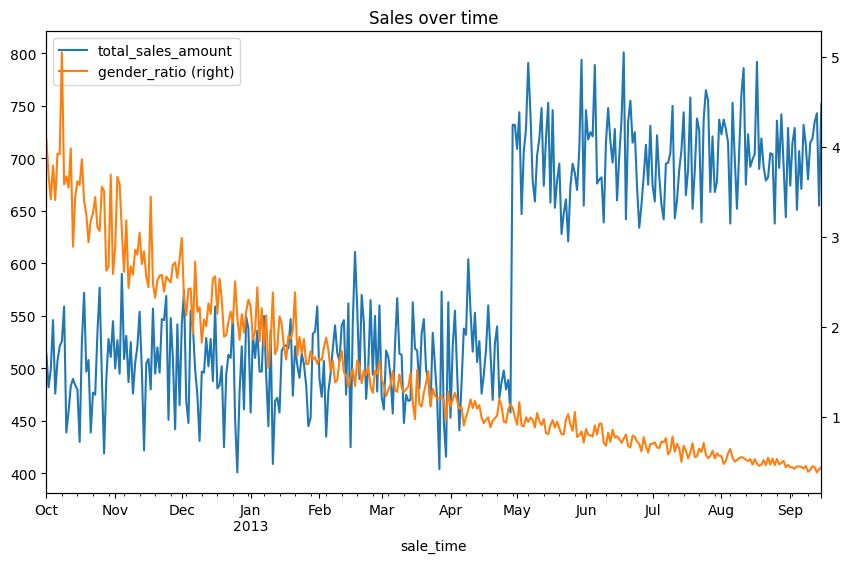

In [361]:
pivoted_df['gender_ratio'] = pivoted_df['female']/pivoted_df['male']
plot_df=pivoted_df.copy()
plot_df['total_sales_amount']  = plot_df['female'] + plot_df['male']
plot_df.drop(columns=['female', 'male'], inplace=True)
plot_df.index = plot_df['sale_time']
plot_df.drop(columns=['sale_time'], inplace=True)
plot_df.plot(y='total_sales_amount', kind='line', title='Sales over time', legend=True, figsize=(10, 6))
plot_df.plot(y='gender_ratio', kind='line', secondary_y=True, ax=plt.gca())
plt.show()

In [362]:
final_df['sale_hour'] = pd.to_datetime(final_df['sale_hour'], format='%H:%M:%S')
# Define a function to map the time to dayparts
def assign_day_part(hour):
    if 0 <= hour < 6:
        return 'night'
    elif 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    else:
        return 'evening'
# Apply the function to create a new column 'daypart'
final_df['daypart'] = final_df['sale_hour'].dt.hour.apply(assign_day_part)

grouped_df = final_df.groupby('daypart').count()
grouped_df.drop(columns=['purchaser_gender'], inplace=True)
grouped_df = grouped_df.rename(columns={'sale_hour': 'total_sales'})
# Reset the index to make 'daypart' a regular column
grouped_df = grouped_df.reset_index()
grouped_df['entire_sum'] = grouped_df['total_sales'].sum()
grouped_df

,daypart,total_sales,entire_sum
0,afternoon,80533,204329
1,evening,42620,204329
2,morning,62870,204329
3,night,18306,204329


In [363]:
grouped_df['Percentage']=grouped_df['total_sales']/grouped_df['entire_sum']*100
grouped_df.drop(columns=['total_sales','entire_sum'], inplace=True)
grouped_df

,daypart,Percentage
0,afternoon,39.413397
1,evening,20.858517
2,morning,30.769005
3,night,8.959081
